# CS 109A/AC 209A/STAT 121A Data Science: Homework 7
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, November 9th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW7.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn import cross_validation
import StringIO
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Last: ZHANG, First: Linying]

### Part (b): Course Number

[AC 209a]

### Part (c): Who did you work with?

[First and Land names of students with whom you have collaborated]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Monitoring Land Cover Changes Using Satellite Images
In the face of rapid urban development and climate change, it is now more urgent than ever for governments (and other organizations) to have a detailed, accurate and up-to-date picture of land use and land cover, as well as how the land use/cover is changing over time, in order to make effective policy decision to manage and protect natural resources. Building such a comprehensive picture of land use/cover for a large region is extremely difficult. 

Recent improvements in satellite imagery and image process have allowed for new tools in land use/cover analysis. The following is an image of the change in vegetation cover around Belize from 1975 to 2007:

<img src="sat.jpg">

In this problem, we will explore how to use classifiers to detect the presence and location of vegetation in satellite images.


### Part 1(a): Detecting vegetation in satellite images

The following files contain sampled locations from satelite aeriel images: `dataset_1.txt`, ... `dataset_4.txt`. The first two columns contain the normalized latitude and longitude values. The last column indicates whether or not the location contains vegetation, with 1 indicating the presence of vegetaion and 0 indicating otherwise. 

These small sets of labels are typically generated by hand (that is, locations might be classified based on field studies or by cross-referencing with government databases). Your task is to use the labeled locations to train a model that will predict whether a new location is vegetation or non-vegetation.

- Suppose we were asked to write a computer program to automatically identify the vegetation regions on the landscape. How can we use the model fitting algorithms you have studied so far to identify the boundaries of the vegetation regions? In particular, discuss the suitability of the following algorithms for each of the four data sets (**you do not need to evaluate your classifier, build your argument using data and decision boundary visualizations**): 
    - linear or polynomial linear regression
    - linear or polynomial logistic regression
    - linear or quadratic discriminant analysis
    - decision trees

- By a quick visual inspection of each data set, what do you think is the smallest depth decision tree that would provide a good fit of the vegetation boundaries in each case? Does `sklearn`'s decision tree fitting algorithm always provide a good fit for the proposed depth? If not, explain why. **Support your answer with suitable visualization**.

We provide you with a function `plot_tree_boundary` to visualize a decision tree model on the data set.

In [207]:
#--------  plot_decision_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (classifier)
#      poly_flag (fits quadratic model if true, otherwise linear)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_decision_boundary(x, y, model, title, ax, bounds=(0, 1), poly_flag=False):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='green')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='white')
    
    # Create mesh
    interval = np.arange(bounds[0], bounds[1], 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax

In [208]:
#--------  plot_tree_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (array of predictors)
#      y (array of labels)
#      model (the decision tree you want to visualize, already fitted)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_tree_boundary(x, y, model, title, ax):
    # PLOT DATA
    ax.scatter(x[y==1,0], x[y==1,1], c='green')
    ax.scatter(x[y==0,0], x[y==0,1], c='white')
    
    # CREATE MESH
    interval = np.arange(0,1,0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    xx = np.concatenate((x1, x2), axis=1)

    # PREDICT ON MESH POINTS
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # PLOT DECISION SURFACE
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # LABEL AXIS, TITLE
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax

In [209]:
#--------  fit_and_plot_dt
# Fit decision tree with on given data set with given depth, and plot the data/model
# Input: 
#      fname (string containing file name)
#      depth (depth of tree)

def fit_and_plot_dt(x, y, depth, title, ax):
    # FIT DECISION TREE MODEL
    dt = tree.DecisionTreeClassifier(max_depth = depth)
    dt.fit(x, y)

    # PLOT DECISION TREE BOUNDARY
    ax = plot_tree_boundary(x, y, dt, title, ax)
    
    return ax

In [210]:
#Load the data from satellite image #1 
sat_img_1 = pd.read_csv('datasets/dataset_1.txt', delimiter=',', header=None)
#The data looks ok, so let's load the rest of the images
sat_img_2 = pd.read_csv('datasets/dataset_2.txt', delimiter=',', header=None)
sat_img_3 = pd.read_csv('datasets/dataset_3.txt', delimiter=',', header=None)
sat_img_4 = pd.read_csv('datasets/dataset_4.txt', delimiter=',', header=None)

#Make a list of the four dataframes so we can iterate through them later
sat_images = [sat_img_1, sat_img_2, sat_img_3, sat_img_4]

### Visualize data

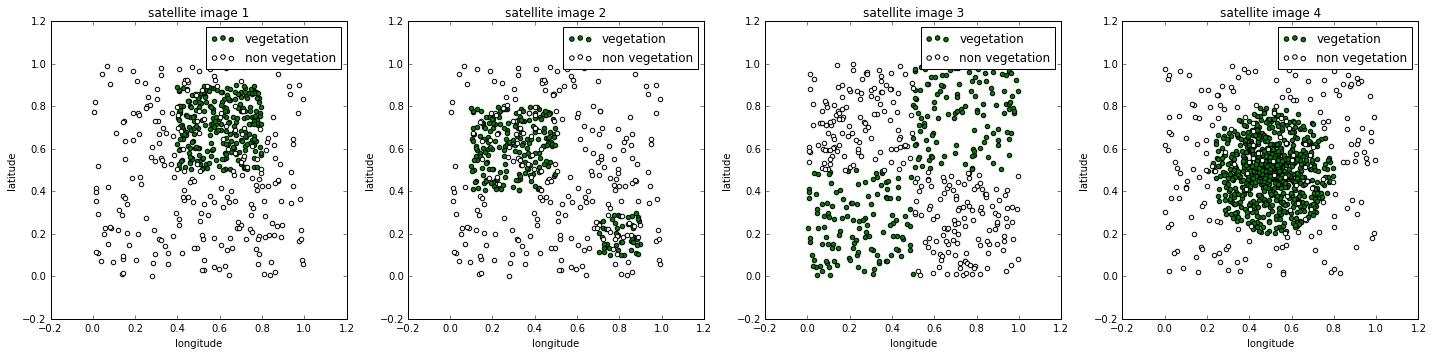

In [211]:
#Plot the data in each dataframe as a subplot of a single figure
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

#Iterate through the four images/dataframes
for i in range(4):
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    #Get the class labels
    y = sat_images[i].values[:, -1]
    
    #Plot vegetation locations as green dots
    ax[i].scatter(x[y == 1, 0], x[y == 1, 1], c='green', label='vegetation')
    #Plot non-vegetation locations as white dots
    ax[i].scatter(x[y == 0, 0], x[y == 0, 1], c='white', label='non vegetation')
    
    #Label everything
    ax[i].set_xlabel('longitude')
    ax[i].set_ylabel('latitude')
    ax[i].set_title('satellite image {}'.format(i + 1))
    ax[i].legend()
    
plt.tight_layout()
plt.show() 

### Linear/Polynomial linear regression

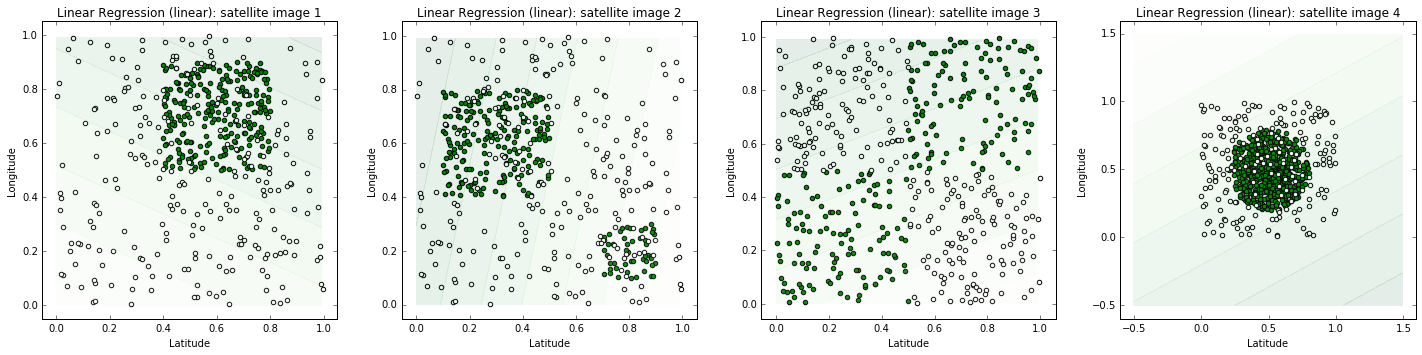

In [226]:
#Plot the data in each dataframe as a subplot of a single figure
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

#Create a linear regression model with linear boundary
linearreg = linear_model.LinearRegression()

#Iterate through the four images/dataframes
for i in range(4):
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    #Get the class labels
    y = sat_images[i].values[:, -1]    
    
    #Fit our linear regression model
    linearreg.fit(x, y)
    
    #Change the bounds on the scatter plot (the 4th dataframe needs a larger frame)
    if i == 3:
        bounds = (-0.5, 1.5)
    else:
        bounds = (0, 1)
    
    #Plot the data along with the decision boundary learned by our model
    ax[i] = plot_decision_boundary(x, y, linearreg, 
                                   'Linear Regression (linear): satellite image {}'.format(i + 1), 
                                   ax[i], bounds)
    

plt.tight_layout()
plt.show()

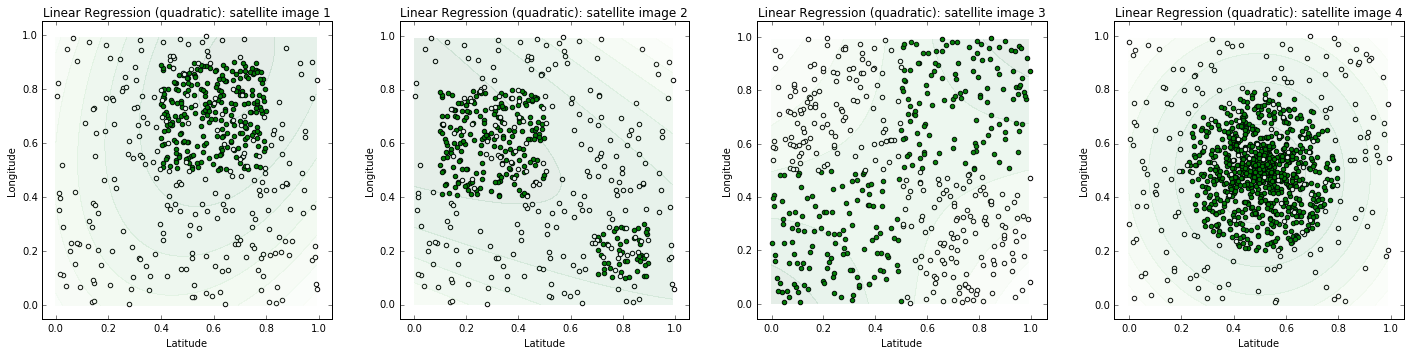

In [227]:
#Plot the data in each dataframe as a subplot of a single figure
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

#Linear Regression with Quadratic Terms
linearreg_poly = linear_model.LinearRegression()

#Iterate through the four images/dataframes
for i in range(4):
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    #Get the class labels
    y = sat_images[i].values[:, -1]  
    
    #Expand our predictor array with quadratic terms
    quad_features = preprocessing.PolynomialFeatures(degree = 2)
    x_expanded = quad_features.fit_transform(x)
    
    #Fit linear regression model with quadratic decision boundary
    linearreg_poly.fit(x_expanded, y)
    
    #Plot the data along with the decision boundary learned by our model
    ax[i] = plot_decision_boundary(x, y, linearreg_poly, 'Linear Regression (quadratic): satellite image {}'.format(i + 1), ax[i], poly_flag=True)
    

plt.tight_layout()
plt.show()

**Analysis:** Linear regression doesn't work in this case because for all the images, the decision boundaries are clearly not linear. Also because this is a classification problem, a continuous linear regression model isn't the right way to go.

### Linear/Polynomial Logistic Regression

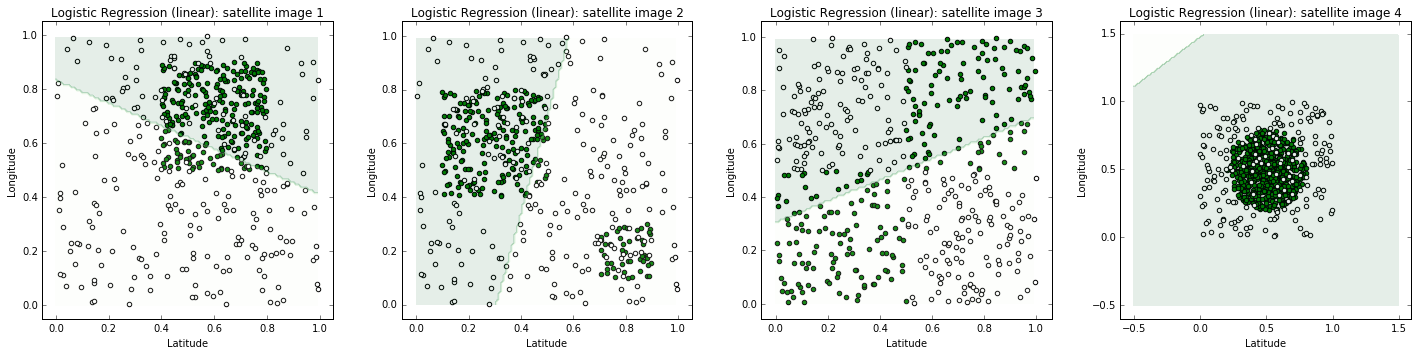

In [212]:
#Plot the data in each dataframe as a subplot of a single figure
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

#Create a logistic regression model with linear boundary
logreg = linear_model.LogisticRegression()

#Iterate through the four images/dataframes
for i in range(4):
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    #Get the class labels
    y = sat_images[i].values[:, -1]    
    
    #Fit our logistic regression model
    logreg.fit(x, y)
    
    #Change the bounds on the scatter plot (the 4th dataframe needs a larger frame)
    if i == 3:
        bounds = (-0.5, 1.5)
    else:
        bounds = (0, 1)
    
    #Plot the data along with the decision boundary learned by our model
    ax[i] = plot_decision_boundary(x, y, logreg, 
                                   'Logistic Regression (linear): satellite image {}'.format(i + 1), 
                                   ax[i], bounds)
    

plt.tight_layout()
plt.show()

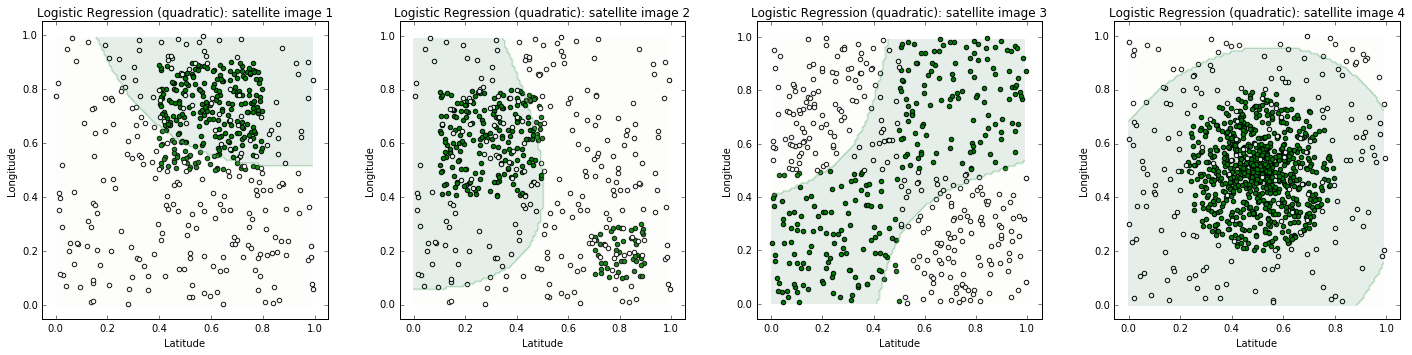

In [213]:
#Plot the data in each dataframe as a subplot of a single figure
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

#Logistic Regression with Quadratic Terms
logreg_poly = linear_model.LogisticRegression()

#Iterate through the four images/dataframes
for i in range(4):
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    #Get the class labels
    y = sat_images[i].values[:, -1]  
    
    #Expand our predictor array with quadratic terms
    quad_features = preprocessing.PolynomialFeatures(degree = 2)
    x_expanded = quad_features.fit_transform(x)
    
    #Fit logistic regression model with quadratic decision boundary
    logreg_poly.fit(x_expanded, y)
    
    #Plot the data along with the decision boundary learned by our model
    ax[i] = plot_decision_boundary(x, y, logreg_poly, 'Logistic Regression (quadratic): satellite image {}'.format(i + 1), ax[i], poly_flag=True)
    

plt.tight_layout()
plt.show()

**Analysis:** Linear logistic regression doesn't do a good job in classifying any of the four datasets because the decision boundaries of all four are not linear. The polynomial logistic regression does work reasonably well on image 1 and 3, and possibly could work for image 4 if we try to tune the regularization parameter a little bit. Both logistic regression do really bad on image 2.

### LDA/QDA

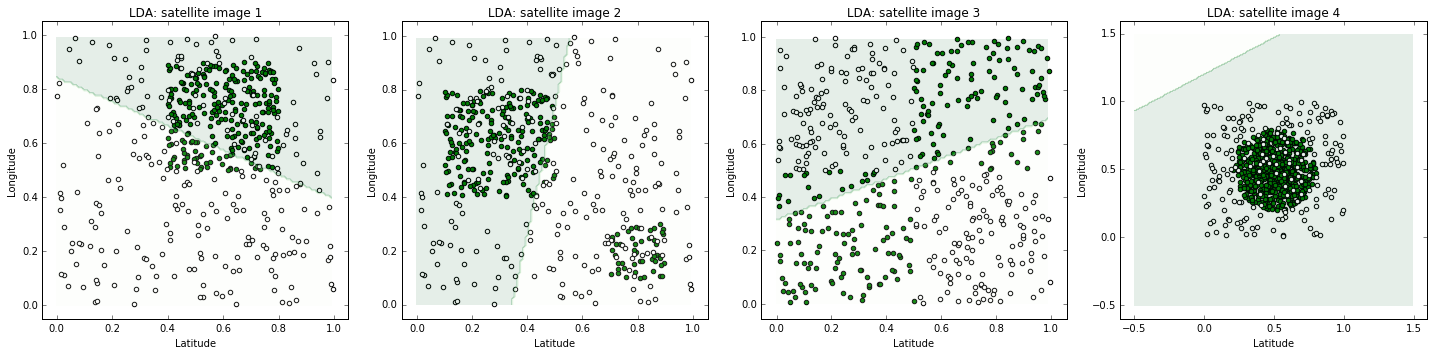

In [214]:
#Plot the data in each dataframe as a subplot of a single figure
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# LDA
lda = discriminant_analysis.LinearDiscriminantAnalysis()

#Iterate through the four images/dataframes
for i in range(4):
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    #Get the class labels
    y = sat_images[i].values[:, -1]  
    
    #Fit our LDA model
    lda.fit(x, y)
    
    #Change the bounds on the scatter plot (the 4th dataframe needs a larger frame)
    if i == 3:
        bounds = (-0.5, 1.5)
    else:
        bounds = (0, 1)
        
    #Plot the data along with the decision boundary learned by our model    
    ax[i] = plot_decision_boundary(x, y, lda, 'LDA: satellite image {}'.format(i + 1), ax[i], bounds)
    

plt.tight_layout()
plt.show()

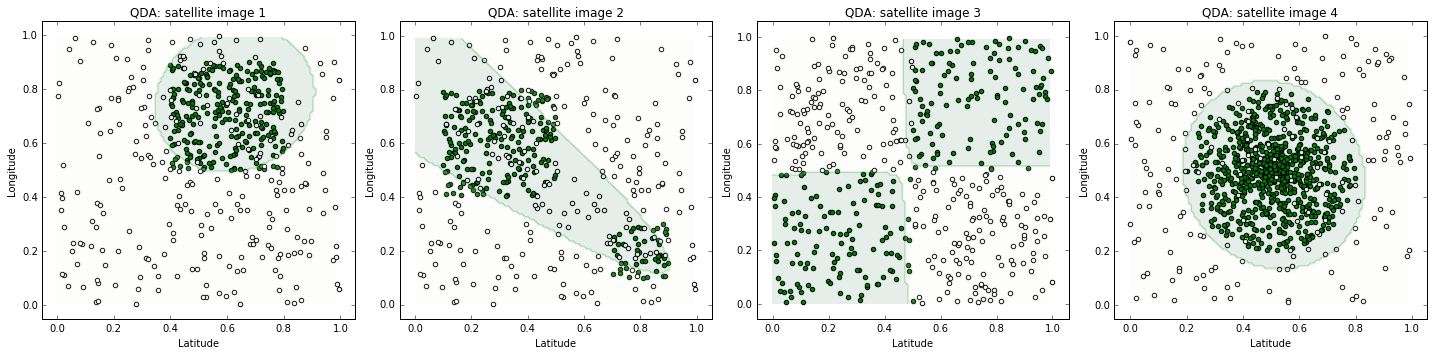

In [215]:
#Plot the data in each dataframe as a subplot of a single figure
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

#Logistic Regression with Quadratic Terms
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()

#Iterate through the four images/dataframes
for i in range(4):
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    #Get the class labels
    y = sat_images[i].values[:, -1]  
    
    #Fit our QDA model
    qda.fit(x, y)
        
    #Plot the data along with the decision boundary learned by our model 
    ax[i] = plot_decision_boundary(x, y, qda, 'QDA: satellite image {}'.format(i + 1), ax[i])
    

plt.tight_layout()
plt.show()

**Analysis:** LDA performs very bad on all four images because decision boundaries of the four are all non-linear. QDA does a good job on image 1, 3, and 4 in separating vegetation from non-vegetation. Its performance on classifying land on image 2 is not ideal: although it identifies most of the vegetation land, there are a lot of dots that are non-vegetation land get mislabeled as "vegetation".

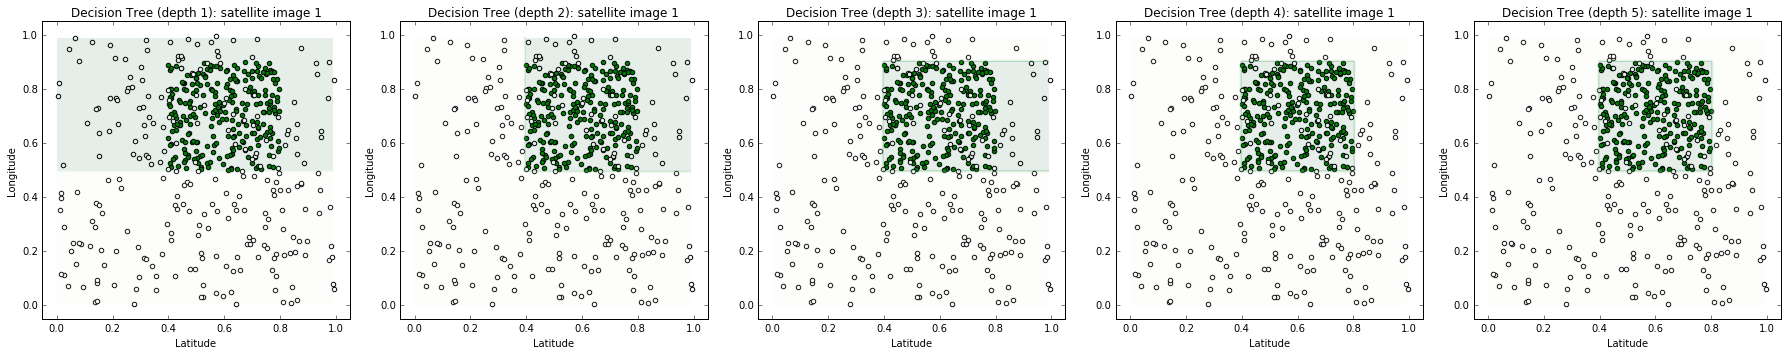

In [216]:
# Plot for dataset_1.txt: depths 1 to 5
fig, ax = plt.subplots(1, len(range(1, 6)), figsize=(25, 5))
#Get the long/lat coords
x = sat_images[0].values[:, :-1]
#Get the class labels
y = sat_images[0].values[:, -1]

#Set an index for the subplots
ind = 0
#Iterate through various depths
for i in range(1, 6):
    #Plot data and decision boundary for decision tree model
    ax[ind] = fit_and_plot_dt(x, y, i, 'Decision Tree (depth {}): satellite image 1'.format(i), ax[ind]) 
    #Increment subplot index
    ind += 1

plt.tight_layout()
plt.show()

**Analysis:** Decision tree does an excellent job in classification when depth =4. Increasing depth beyond 4 is not necessary in this case.

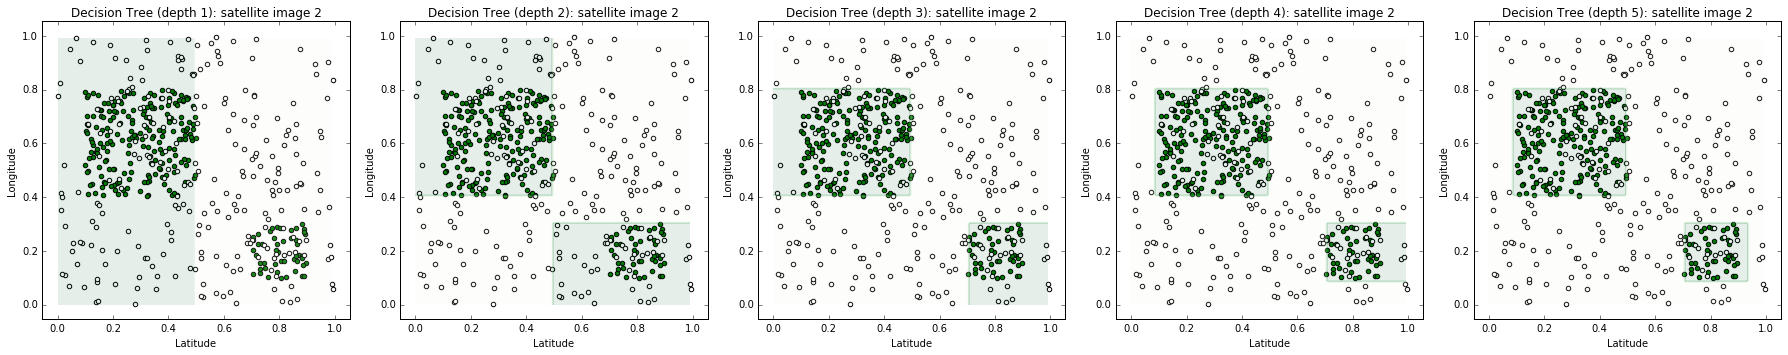

In [217]:
# Plot for dataset_2.txt: depths 1 to 5
fig, ax = plt.subplots(1, len(range(1, 6)), figsize=(25, 5))

#Get the long/lat coords
x = sat_images[1].values[:, :-1]
#Get the class labels
y = sat_images[1].values[:, -1]

#Set an index for the subplots
ind = 0
#Iterate through various depths
for i in range(1, 6):
    #Plot data and decision boundary for decision tree model
    ax[ind] = fit_and_plot_dt(x, y, i, 'Decision Tree (depth {}): satellite image 2'.format(i), ax[ind]) 
    #Increment subplot index
    ind += 1

plt.tight_layout()
plt.show()

**Analysis:** Decision tree does an excellent job of classification when depth =5 in this case. 

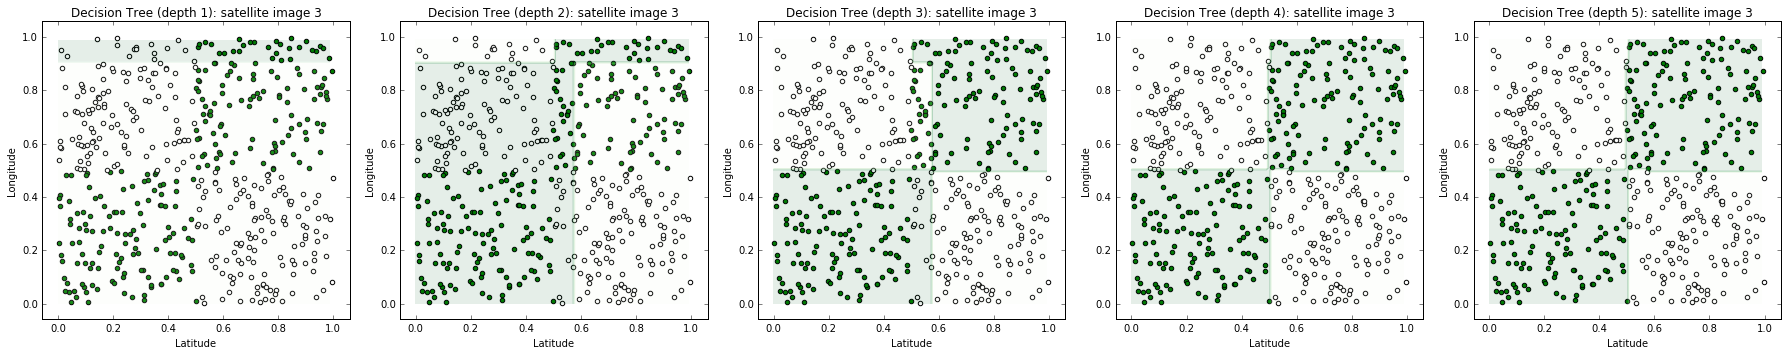

In [218]:
# Plot for dataset_3.txt: depths 1 to 5
fig, ax = plt.subplots(1, len(range(1, 6)), figsize=(25, 5))

#Get the long/lat coords
x = sat_images[2].values[:, :-1]
#Get the class labels
y = sat_images[2].values[:, -1]

#Set an index for the subplots
ind = 0
#Iterate through various depths
for i in range(1, 6):
    #Plot data and decision boundary for decision tree model
    ax[ind] = fit_and_plot_dt(x, y, i, 'Decision Tree (depth {}): satellite image 3'.format(i), ax[ind]) 
    #Increment subplot index
    ind += 1

plt.tight_layout()
plt.show()

**Analysis:** Decision tree does an excellent job in classification when depth =4. Increasing depth beyond 4 is not necessary in this case.

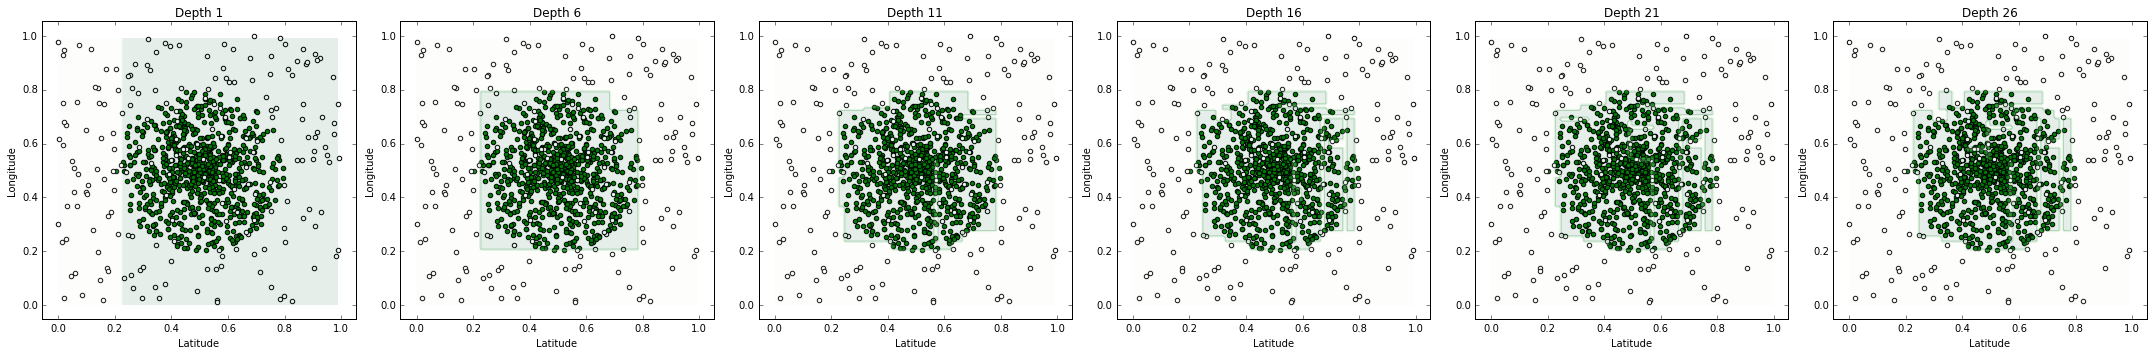

In [219]:
# Plot for dataset_4.txt: depths 1 through 26
fig, ax = plt.subplots(1, len(range(1, 27, 5)), figsize=(30, 5))

#Get the long/lat coords
x = sat_images[3].values[:, :-1]
#Get the class labels
y = sat_images[3].values[:, -1]

#Set an index for the subplots
ind = 0
#Iterate through various depths
for i in range(1, 27, 5):
    #Plot data and decision boundary for decision tree model
    ax[ind] = fit_and_plot_dt(x, y, i, 'Depth {}'.format(i), ax[ind]) 
    #Increment subplot index
    ind += 1
    
plt.tight_layout()
plt.show()

**Analysis:** Decision tree still does the job in classfying vegetation land from non-vegetation land in this case, but it needs more depth to achieve a good separation because decision tree only does straight cuts while the shape here is a circle. So technically it takes infinite cuts to draw a circle. Depends on the specific requirement and objective of the project, depth between 6-11 is a reasonable range for the tree. If we go beyond 11, we will very likely overfit the data as seen from the last graph above.

**Summary of Part1(a):** Given this is a classfication problem, continous model (ex. linear regression) is very unlikely to work. Based on the possible curvature of the decision boundary, we can choose between models that draw a linear decision boundary(ex. linear logistic regression, LDA) and models that draw a curved decision boundary (ex. polynomial logistic regression, QDA). Decision tree is aa very useful tool in classification problems, and the optimal depth can vary in dataset, and should be tuned case by case.

### Part 1(b). What is the best splitting criterion for decision trees?
Suppose you are given a data set with 100 points in a satellite image, of which 51 are class 1 and 49 are class 0. Consider following two candidate splits for constructing a decision tree: 
1. [Part 1 = (Class 1: 11, Class 0: 37), Part 2 = (Class 1: 40, Class 0: 12)]
2. [Part 1 = (Class 1: 25, Class 0: 48), Part 2 (Class 1: 26, Class 0: 1)]

Which of these is a better split according classification error, Gini coefficient, and Entropy criteria? Do the three criteria agree on the best split, or is one better than the other? Support your answer with a concrete explanation.

In [17]:
# Calculate classification accuracy for a binary split
def err(x1, x2):
    return min((x1,x2))

# Calculate Gini coefficient for a binary split
def Gini(x1, x2):
    return x1*(1-x1) + x2*(1-x2)

# Calculate Cross-entropy for a binary split
def entropy(x1, x2):
    return -x1*np.log(x1) - x2*np.log(x2)

# Split 1:
# Compute split counts
n11 = 48
n12 = 52
n1 = n11 + n12

# Compute split probabilities
x1 = 11./n11
x2 = 37./n11
y1 = 40./n12
y2 = 12./n12

print('Split 1')
print('Error = ' + str((n11*err(x1,x2)+n12*err(y1,y2))/n1))
print('Gini = ' + str((n11*Gini(x1,x2)+n12*Gini(y1,y2))/n1))
print('Entropy = ' + str((n11*entropy(x1,x2)+n12*entropy(y1,y2))/n1))

print('')

# Compute split counts
n21 = 73
n22 = 27
n2 = n21 + n22

# Split 2:
x1 = 25./n21
x2 = 48./n21
y1 = 26./n22
y2 = 1./n22

print('Split 2')
print('Error = ' + str((n21*err(x1,x2)+n22*err(y1,y2))/n2))
print('Gini = ' + str((n22*Gini(x1,x2)+n22*Gini(y1,y2))/n2))
print('Entropy = ' + str((n22*entropy(x1,x2)+n22*entropy(y1,y2))/n2))

Split 1
Error = 0.23
Gini = 0.354198717949
Entropy = 0.539274531592

Split 2
Error = 0.26
Gini = 0.140858058283
Entropy = 0.216288369906


**Analysis:** While Split 1 has lower error, Split 2 is better, as the partitions are *purer* - the right-hand partition contains an almost perfect classification.

Gini coefficient and Cross-entropy choose Split 2 over Split 1, showing that they promote purer splits. This shows that these are better criteria are than error.



## Problem 2: Loan Risk Assessment
In this problem, you are asked by an Unamed National Bank to build a risk assessment model that predicts whether or not it is risky to give a loan to an applicant based on the information provided in their application. Traditionally, loan applications are processed and assessed by hand, but now the bank wants to move to an automated loan processing system. That is, the bank will provide you with loan applications that it has processed in the past for you to build a classifier for risk assessment, going forward, the bank will reject the loan applications from applicants labeled risky and approve the applications that are labeled safe by your model.

The relevant training and test sets are provided in the files: `dataset_5_train.txt` and `dataset_5.test.txt`. The training and testing sets are created from both approved and rejected loan applications that the bank has processed by hand in the past. The first 24 columns contain attributes for each applicant gathered from their application, and the last column contains the credit risk assessment with 1 indicating that the customer is a loan risk, and 0 indicating that the customer is not a loan risk. The names of the attributes are provided in the file `dataset_5_description.txt`.


### Part 2(a): A simple decision tree model
- Fit a simple decision tree of depth 2 to the training set and report its accuracy on the test set. 

- Interpret the way your model performs risk classifcation. Would you recommend this classifier to Unamed National Bank for making decisions on the loan applications of **real people**? If yes, make an argument for the merrits of this classifer. If no, then make necessary changes to the data set and fit a new classifier that you believe is fair to use in practice, then compare the two classifiers.


We have provided you with a function `display_dt` to display the structure of the decision tree in DOT format.

In [335]:
# Print decision tree model 'model', already fitted
def display_dt(model):
    dummy_io = StringIO.StringIO() 
    tree.export_graphviz(model, out_file = dummy_io, feature_names = column_names) 
    print dummy_io.getvalue()

In [336]:
# Load the train and test data
train = pd.read_csv('datasets/dataset_5_train.txt', delimiter=',', header = None)
test = pd.read_csv('datasets/dataset_5_test.txt', delimiter=',', header = None)

# Add column names based on the description file
column_names = ['census_code', 'credit', 'gender', 'education', 'marital_status', 'age',
                'payment_sep', 'payment_aug', 'payment_jul', 'payment_jun', 'payment_may', 
                'payment_apr', 'bill_sep', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 
                'bill_apr', 'amount_paid_sep', 'amount_paid_aug', 'amount_paid_jul', 
                'amount_paid_jun', 'amount_paid_may', 'amount_paid_apr', 'risk']
train = pd.DataFrame(train.values, columns = column_names)
test = pd.DataFrame(test.values, columns = column_names)

In [337]:
print "The mean of risk in train: ", train['risk'].mean()
print "The mean of risk in train: ", test['risk'].mean()
print "Both datasets are balanced dataset."

The mean of risk in train:  0.512
The mean of risk in train:  0.501641025641
Both datasets are balanced dataset.


In [340]:
# Separate x and y
x_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
x_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]
    
# FIT DECISION TREE MODEL of depth 2
dt = tree.DecisionTreeClassifier(max_depth = 2)
dt.fit(x_train, y_train)
accuracy_test = dt.score(x_test, y_test)
print "The accuracy of prediction on test set: ", accuracy_test

The accuracy of prediction on test set:  0.880615384615


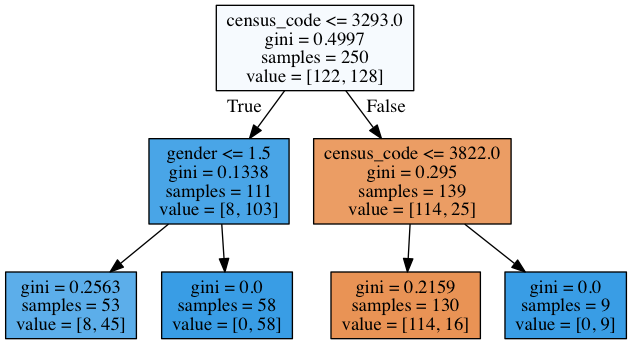

In [343]:
import pydotplus
import graphviz
from IPython.display import Image

def show_tree(decisionTree):
    dotfile = StringIO.StringIO()
    tree.export_graphviz(decisionTree, out_file=dotfile, feature_names = column_names, filled = True)
    graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
    return (graph)

graph = show_tree(dt)
Image(graph.create_png())

**Analysis:** This model uses the census code that carries ethnicity information as a key variable in classification, which could envoke concerns about race discrimination, and classifying clients this way is very unfair to people who are in the "high risk" ethnicity group but actually have good credit history. Because the concern of racial discrimination, it is better to remove this variable in our model building process.

The accuracy of prediction on test set:  0.604307692308


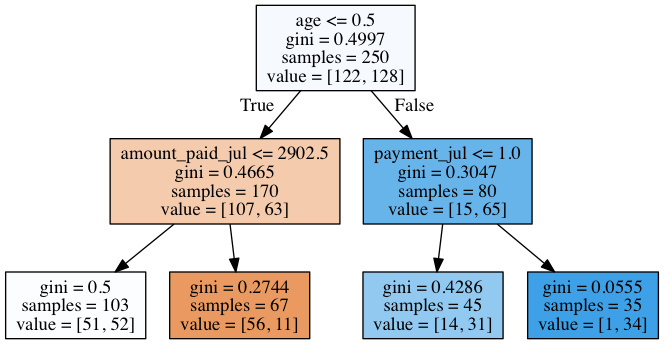

In [154]:
# Remove census code
x_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]
x_test = test.iloc[:, 1:-1]
y_test = test.iloc[:, -1]

# FIT DECISION TREE MODEL of depth 2
dt = tree.DecisionTreeClassifier(max_depth = 2)
model = dt.fit(x_train, y_train)
accuracy_test = model.score(x_test, y_test)
print "The accuracy of prediction on test set: ", accuracy_test

# Plot the decision tree
graph = show_tree(model)
Image(graph.create_png())


The prediction accuracy drops significantly from more than 80% to 60% when census code is removed. However, we should keep in mind that the risk label are given by employees in the bank, which could be subjective (and census code may be one of the important criteria they reply on). So the risk label in the training data is suspicious itself, and may not be a good response variable. Instead, we can use some other variables such as payment history, which are more objective in assessing their loan risk.

### Part 2(b): An ensemble of decision trees

- One way to improve the prediciton accuracy for this task is to use an ensemble of decision trees fitted on random samples, as follows: given a training set of size $n$, sample new training sets uniformly with replacement, and fit a decision tree model on each random sample.

  Now, how would you combine the ensemble into a single classifier? There are at lease two ways:

   - *Random classifier*: predict using a randomly chosen decision tree from the ensemble
   - *Majority classifier*: predict using the majority vote from decision trees in the ensemble
   
   

- We can also fit a *Random Forest* model for our data (`sklearn.ensemble.RandomForestClassifier`).

Is there a significant difference in the prediction accuracies of the above three approaches on the loan data set? If so, explain why.


**Note:**  The Random Forest approach can easily overfit the training set. What are the important parameters in `sklearn`'s Random Forest fitting function that influence the model fit? For the risk assessment task, you **need** to fit your random forest model by using a suitable model selection procedure to tune these parameters.





### Random Classifier

In [345]:
# Random classifier: predict using a randomly chosen decision tree from the ensemble
    # Generate 20 models by boostrapping
        # fix depth = 3
        # Bootstrap 50 samples each time
    # Randomly choose a model from the 20 models each time when predict a person from the test set

    
#### Implementation:
# dataset without census code
x_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]
x_test = test.iloc[:, 1:-1]
y_test = test.iloc[:, -1]


# Size of the data set
n = x_train.shape[0]

# No. of subsamples
num_samples = 20


# Create list to store 20 models
model_list = []

for i in range(num_samples):

    # Generate a random subsample of data points by boostrapping
    # train set subsample = 20
   
    perm = np.random.randint(low=0, high=n, size=n) # Generate a list of indices 0 to n and permute it    
    x_train_perm = x_train.ix[perm]
    y_train_perm = y_train.ix[perm] 
    
    x_subsample = x_train_perm.iloc[:50, :]
    y_subsample = y_train_perm.iloc[:50, ]
    
    # Fit decision tree on train set
    dt = tree.DecisionTreeClassifier(max_depth = 3)
    dt.fit(x_subsample, y_subsample)
    model_list.append(dt)


y_pred = []

# Predict y of test set
for i in range(x_test.shape[0]):
    
    # Randomly select a model
    model_index = np.random.randint(0, 20)
    model_selected = model_list[model_index]

    # predict y
    y_pred.append(model_selected.predict(x_test.iloc[i, :].reshape(1,-1)))

print 'Accuracy of random classifier: ', np.mean(np.array(y_test) == y_pred)

Accuracy of random classifier:  0.49995825904


### Majority classifier

In [346]:
# Majority classifier: predict using the majority vote from decision trees in the ensemble
    # Interate through depth from 1 to 20
        # At a given depth, bootstrap 20 samples to fit a model. Predict y of test set. Repeat 100 times.
        # The class gets the most votes is assigned to the subject
        # Average accuracy is obtained by averaging 100 bootsrap predictions.
        
#### Implementation:
# dataset without census code
x_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]
x_test = test.iloc[:, 1:-1]
y_test = test.iloc[:, -1]


# Size of the data set
n_train = x_train.shape[0]
n_test = x_test.shape[0]

# No. of subsamples
num_samples = 100
# No. of decision tree depth
num_depth = 20


# Fit decision tree
for depth in range(1, num_depth):
    
    # Store votes
    y_votes = np.zeros([n_test, 2])
    
    # Bootstrap
    for i in range(num_samples):

        # Generate a random subsample of data points
        perm = np.random.randint(low=0, high=n, size=n) # Generate a list of indices 0 to n and permute it    
        x_train_perm = x_train.ix[perm]
        y_train_perm = y_train.ix[perm] 

        x_subsample = x_train_perm.iloc[:20, :]
        y_subsample = y_train_perm.iloc[:20, ]
        
        # Fit decision tree on train set
        dt = tree.DecisionTreeClassifier(max_depth = depth)
        dt.fit(x_subsample, y_subsample)

        # Predict y of test set
        y_pred = dt.predict(x_test)
        

        #Votes for 0
        y_votes[y_pred == 0, 0] += 1
        #Votes for 1
        y_votes[y_pred == 1, 1] += 1
    
           
    #For each person, label it with the class that get the most votes
    y_test_pred = y_votes.argmax(axis = 1) # Returns the indices of the maximum values along an axis.
    
    #Accuracy of our predictions
    print 'Accuracy of combined model with depth '+str(depth), np.mean(y_test == y_test_pred)

Accuracy of combined model with depth 1 0.661230769231
Accuracy of combined model with depth 2 0.664717948718
Accuracy of combined model with depth 3 0.658051282051
Accuracy of combined model with depth 4 0.657641025641
Accuracy of combined model with depth 5 0.657538461538
Accuracy of combined model with depth 6 0.668102564103
Accuracy of combined model with depth 7 0.64758974359
Accuracy of combined model with depth 8 0.664102564103
Accuracy of combined model with depth 9 0.676205128205
Accuracy of combined model with depth 10 0.677128205128
Accuracy of combined model with depth 11 0.662769230769
Accuracy of combined model with depth 12 0.679794871795
Accuracy of combined model with depth 13 0.651076923077
Accuracy of combined model with depth 14 0.657333333333
Accuracy of combined model with depth 15 0.658153846154
Accuracy of combined model with depth 16 0.661230769231
Accuracy of combined model with depth 17 0.650051282051
Accuracy of combined model with depth 18 0.647794871795
Ac

### Random Forest

In [347]:
# IMPORT STUFF
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

# special matplotlib argument for improved plots
from matplotlib import rcParams
from IPython.display import Image
import pydotplus

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn import tree

In [348]:
# A generic function to do CV

def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)

    best = gs.best_estimator_
    return best

In [349]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Important parameters
#
# targetname - name of column you want to predict (e.g. 0 or 1, 'M' or 'F', 
#              'yes' or 'no')
# target1val - particular value you want to have as a 1 in the target
# reuse_split - dictionary that contains traning and testing dataframes 
#              (we'll use this to test different classifiers on the same 
#              test-train splits)
# score_func - we've used the accuracy as a way of scoring algorithms but 
#              this can be more general later on
# n_folds - Number of folds for cross validation ()
# n_jobs - used for parallelization
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

def do_classify(clf, parameters, Xtrain, ytrain, Xtest, ytest, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf

In [351]:
from sklearn.ensemble import RandomForestClassifier
import StringIO


clfForest = RandomForestClassifier()


# TRAINING AND TESTING without census code
Xtrain = train.iloc[:, 1:-1]
ytrain = train.iloc[:, -1]
Xtest = test.iloc[:, 1:-1]
ytest = test.iloc[:, -1]

# FIT THE TREE 
clf=clfForest.fit(Xtrain, ytrain)

print clfForest.n_estimators

training_accuracy = clfForest.score(Xtrain, ytrain)
test_accuracy = clfForest.score(Xtest, ytest)
print "############# based on standard predict ################"
print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)
print confusion_matrix(ytest, clf.predict(Xtest))
print "########################################################"

parameters = {"n_estimators": [5, 10, 20, 40, 80], "max_depth": [1, 2, 4, 8, 16], 'max_features': [1, 2, 4, 8, 16]}
clfForest = do_classify(clfForest, parameters, Xtrain, ytrain, Xtest, ytest, 'risk', 1, mask=None, 
                        n_jobs = 4, score_func='f1')

print "The number of trees: ", clfForest.n_estimators
print "The optimal maximum number of depth: ", clfForest.max_depth
print "The optimal maximum number of features: ", clfForest.max_features

10
############# based on standard predict ################
Accuracy on training data: 0.98
Accuracy on test data:     0.65
[[3362 1497]
 [1879 3012]]
########################################################
############# based on standard predict ################
Accuracy on training data: 0.74
Accuracy on test data:     0.66
[[2838 2021]
 [1307 3584]]
########################################################
The number of trees:  80
The optimal maximum number of depth:  2
The optimal maximum number of features:  1


**Analysis:** The random classifier achieves 50% accuracy, which is the same as randomly guessing the label (since this is a balanced dataset). Majority classifier improves the accuracy to 65%, and depth doesn't seem to affect the accuracy that much. Random forest default performs as good as majority classifer, with about 65% accuracy on the test set. I tried varying parameters, such as number of trees, maximum depth, and maximum features, and the optimal combination shown above doesn't seem to improve the test accuracy. 

## Challenge Problem: Boosting for Classification

We've seen in class that boosting is a useful ensemble method to combine a collection of simple regression trees into a powerful regression model. Chapter 10.1 of the text book ([*J.H. Friedman, R. Tibshirani, and T. Hastie, "The Elements of Statistical Learning"*](http://statweb.stanford.edu/~tibs/ElemStatLearn/)) describes the boosting technique for classification trees. Implement the method from scratch.
    
Write a function `fit_and_score_boosted_trees` satisfying:
- Input:
    - `x_train`:  Array of predictors in training set
    - `y_train`:  Array of binary responses in training set
    - `x_test`:  Array of predictors in training set
    - `y_test`:  Array of binary responses in training set
    - `M`:  Number of iterations / Number of decision trees in the ensemble
    - `depth`:  Depth of each decision tree
- Fits an ensemble of `T` decision trees to the training set
- Output:
    - `test_accuracy`:  classification accuracy of the ensemble on the test set

Your function will also have to **standardise** the predictors in the training and test sets before applying boosting.
   
**Hints:** 
- `sklearn`'s decision tree learning routine has an option to specific weights on the training points
- `sklearn`'s classifiers make predictions in {0,1} while the book assumes predictions in {-1, 1}

Your implementation will be evaluated based on three test cases: 

`challenge_testcase_1_train.txt`, `challenge_testcase_1_test.txt`

`challenge_testcase_2_train.txt`, `challenge_testcase_2_test.txt`

`challenge_testcase_3_train.txt`, `challenge_testcase_3_test.txt`

These cases represent extreme examples of data (each dataset contains a particular type of pathology) that might break an implementaiton that is not carefully thought through. 

**Run the code given below to test your implementation. Call `test_implementation` and pass it your function `fit_and_score_boosted_trees`.**

In [333]:
#--------  fit_and_score_boosted_trees
    # Input: 
        # x_train: Array of predictors in training set
        # y_train: Array of binary responses in training set
        # x_test: Array of predictors in training set
        # y_test: Array of binary responses in training set
        # M: Number of iterations / Number of decision trees in the ensemble
        # depth: Depth of each decision tree
    # Output:
        # score of test set



def fit_and_score_boosted_trees(x_train, y_train, x_test, y_test, M, depth):
    
    # Check for 0 standard deviation
    # If std = 0, change it to 1 to avoid NaN in standardization
    train_std = x_train.std(axis=0)
    train_std[train_std == 0]=1

    # Standardize parameters
    x_train_standardize = (x_train - x_train.mean(axis=0))/train_std
    x_test_standardize = (x_test - x_train.mean(axis=0))/train_std

    # Encode label as 0 and 1
    le = preprocessing.LabelEncoder()
    le.fit(y_train)
    y_train = le.transform(y_train)
    le.fit(y_test)
    y_test = le.transform(y_test)


    # Initialize weight
    N= float(x_train_standardize.shape[0])
    w = np.ones(N)/N


    # Store final weighted prediction
    y_pred_final = np.zeros([1, x_test_standardize.shape[0]])

    for m in range(1, M+1):
        # Fit decision tree on train set
        dt = tree.DecisionTreeClassifier(max_depth = depth)
        dt.fit(x_train, y_train, sample_weight = w)
        y_pred = dt.predict(x_train)

        # Compute err
        I = y_pred != y_train
        numarator = (w*I).sum()
        err = numarator/ w.sum()


        # Compute alpha
        alpha = np.log((1-err)/err)


        # Update the weight parameter
        w = w * np.exp(alpha*I)

        # Use model to predict lable of test set
        y_pred = dt.predict(x_test)
        # Update sign of G(x)
        y_pred[y_pred == 0] = -1
        y_pred_final += alpha*y_pred

    # Determine the sign of of weighted majority vote
    y_pred_final[y_pred_final<=0]=0
    y_pred_final[y_pred_final>0]=1

    # Compute accuracy of test set 
    count = 0
    for i in range(x_test_standardize.shape[0]):
        if y_pred_final.T[i] == y_test[i]:
            count+=1

    test_accuracy = float(count)/x_test_standardize.shape[0]
    return test_accuracy

In [354]:
#--------  test_implementation
# A function that tests your fit_and_score_boosted_trees function using three test sets.
# Input: 
#      fit_and_score_boosted_trees (your implementation of the boosting function)
# Returns: 
#      None

def test_implementation(fit_and_score_boosted_trees):
    
    # Iterate over test cases
    for i in range(1,4):
        # Load train & test data
        data_train = np.loadtxt('datasets/challenge_testcase_' + str(i) + '_train.txt', delimiter=',')
        data_test = np.loadtxt('datasets/challenge_testcase_' + str(i) + '_test.txt', delimiter=',')

        # Split label and instances
        y_train = data_train[:,-1]
        x_train = data_train[:,0:-1]

        y_test = data_test[:,-1]
        x_test = data_test[:,0:-1]

        # Run boosting function
        print 'Test case', i, ':', fit_and_score_boosted_trees(x_train, y_train, x_test, y_test, 10, 10)    

In [355]:
#Implement test on three datasets
test_implementation(fit_and_score_boosted_trees)

Test case 1 : 0.635692307692
Test case 2 : 0.636820512821
Test case 3 : 0.625743589744


**Analysis:** Our model has about 60% accuracy on the three test sets. Varying the number of trees and depth, both between 10 and 100, do not change the test accuracy much.